# Part E: Two-Qubit System Analysis with VQE

### Introduction

In this part to find the ground state energy of our two level Hamiltonian with help of two qubit qunatum circuit.

We prepare the ansatz circuit like in this:

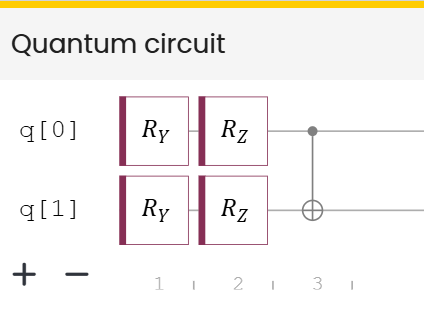

Our `VQE` implementation does allow for multiple variational layers, however we have figured that one layer is sufficient for our Hamiltonian and thus converges quick enough.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from quantum_computing.p1.vge.vge import VQE
from quantum_computing.p1.vge.vqe2 import VQE as VQE2
from quantum_computing.p1.hamiltonian.hamiltonian import TwoQubitHamiltonian

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [7, 3]
plt.rcParams['font.size'] = 12

## Setting Up the Hamiltonian

First, we'll set up the two-qubit Hamiltonian using the same parameters as in Part D:

In [42]:
# Interaction parameters
H_x = 2.0
H_z = 3.0

# Non-interacting energies [ε_00, ε_01, ε_10, ε_11]
energies_noninteracting = [0.0, 2.5, 6.5, 7.5]

# Create the Hamiltonian
hamiltonian = TwoQubitHamiltonian(energies_noninteracting, H_x, H_z)
lambda_values = np.linspace(0, 1, 11)

## Eigenvalues as a function of $\lambda$
First we compute the eigenvalues of the system as we vary $\lambda$

In [43]:

vqe_eigenvalues = []
exact_eigenvalues = []

for lambda_val in lambda_values:
    H = hamiltonian.create_total_H(lambda_val)
    w, v = np.linalg.eigh(H)
    exact_eigenvalues.append(w)
    print(f"Exact eigenvalues: {w}")


    vqe = VQE(H,2)
    print(f"\nSolving for λ = {lambda_val}")
    
    best_energy = float('inf')
    for _ in range(5):
        params, energy = vqe.optimize()
        if energy < best_energy:
            best_energy = energy
    
    vqe_eigenvalues.append([best_energy, None]) 
    print(f"VQE ground state energy: {best_energy}")

Exact eigenvalues: [0.  2.5 6.5 7.5]

Solving for λ = 0.0
VQE ground state energy: 0.0
Exact eigenvalues: [0.29467045 2.19002488 6.20997512 7.80532955]

Solving for λ = 0.1
VQE ground state energy: 0.2946704538749263
Exact eigenvalues: [0.57872701 1.86039219 5.93960781 8.12127299]

Solving for λ = 0.2
VQE ground state energy: 0.5787270053734006
Exact eigenvalues: [0.85230333 1.5119387  5.6880613  8.44769667]

Solving for λ = 0.30000000000000004
VQE ground state energy: 0.8523033296483548
Exact eigenvalues: [1.11561609 1.14593408 5.45406592 8.78438391]

Solving for λ = 0.4
VQE ground state energy: 1.1156160859924746
Exact eigenvalues: [0.76393202 1.36895633 5.23606798 9.13104367]

Solving for λ = 0.5
VQE ground state energy: 0.7639320225002111
Exact eigenvalues: [0.36761924 1.61267858 5.03238076 9.48732142]

Solving for λ = 0.6000000000000001
VQE ground state energy: 0.36761924206188135
Exact eigenvalues: [-0.04131112  1.84718849  4.84131112  9.85281151]

Solving for λ = 0.7000000000000

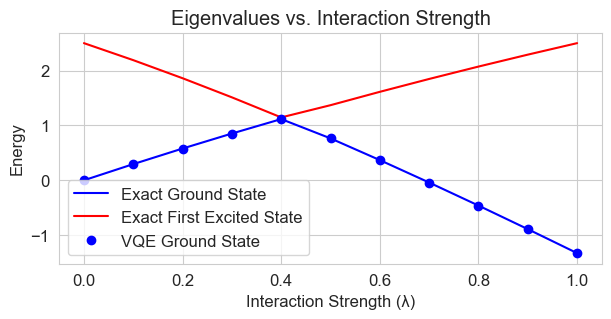

In [79]:


plt.plot(lambda_values, [eig[0] for eig in exact_eigenvalues], 'b-', label='Exact Ground State')
plt.plot(lambda_values, [eig[1] for eig in exact_eigenvalues], 'r-', label='Exact First Excited State')

plt.plot(lambda_values, [eig[0] for eig in vqe_eigenvalues], 'bo', label='VQE Ground State')

plt.xlabel('Interaction Strength (λ)')
plt.ylabel('Energy')
plt.title('Eigenvalues vs. Interaction Strength')
plt.legend()
plt.grid(True)
plt.show()

We see that the ground state energy found by our VQE clearly follows the exact eigenvalues of the Hamiltonian as we vary $\lambda$. And we see that the ground state energy and the first excited state energy are degenerate for $\lambda = 0.4$ As we have seen in the previous part. Clear indication of large system change. 

## Analysis using a spesifc $\lambda$


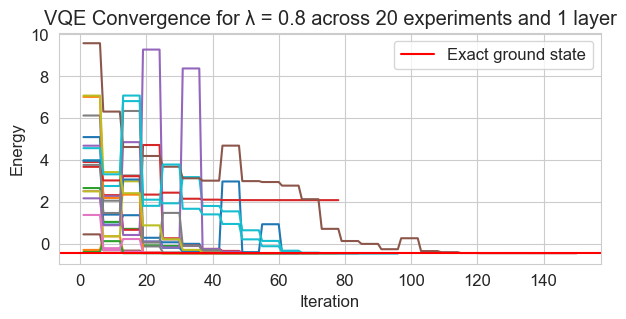

Exact ground state energy: -0.4612496949731399
Best VQE energy: -0.4612496949731395
Energy difference: 3.885780586188048e-16


In [82]:
detailed_lamdda = 0.8
num_experiments = 20

H_detailed = hamiltonian.create_total_H(detailed_lamdda)
exact_ground_state = np.linalg.eigvalsh(H_detailed)[0]

best_energies = []

for experiment in range(num_experiments):
    vqe_experiment = VQE(H_detailed, 2)
    params, energy = vqe_experiment.optimize()
    best_energies.append(energy)
    
    energy_history = vqe_experiment.get_energy_history()
    iterations = list(range(1, len(energy_history) + 1))
    
    plt.plot(iterations, energy_history, '-')
    
plt.axhline(y=exact_ground_state, color='r', linestyle='-', label='Exact ground state')

plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title(f'VQE Convergence for λ = {detailed_lamdda} across {num_experiments} experiments and 1 layer')
plt.legend()
plt.grid(True)
plt.show()

print(f"Exact ground state energy: {exact_ground_state}")
print(f"Best VQE energy: {min(best_energies)}")
print(f"Energy difference: {min(best_energies) - exact_ground_state}")

The above figre shows the converges the ground state energy across multiple experiments for
$\lambda = 0.8$ we see that the energy converges vary in iteration numbers, with usually converging before 60 iterations.

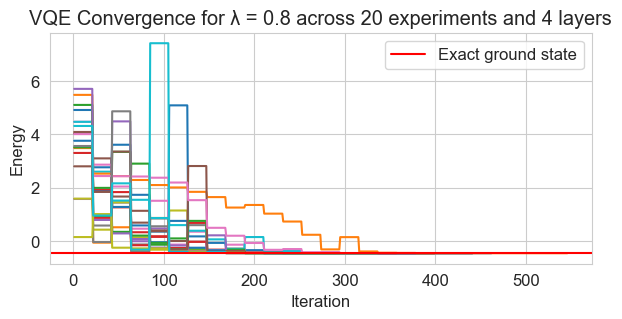

Exact ground state energy: -0.4612496949731399
Best VQE energy: -0.4612496949731222
Energy difference: 1.7708057242771247e-14


In [80]:
detailed_lamdda = 0.8
num_experiments = 20

H_detailed = hamiltonian.create_total_H(detailed_lamdda)
exact_ground_state = np.linalg.eigvalsh(H_detailed)[0]

best_energies = []

for experiment in range(num_experiments):
    vqe_experiment = VQE(H_detailed, 2,layers=4)
    params, energy = vqe_experiment.optimize()
    best_energies.append(energy)

    energy_history = vqe_experiment.get_energy_history()
    iterations = list(range(1, len(energy_history) + 1))    

    plt.plot(iterations, energy_history, '-')

plt.axhline(y=exact_ground_state, color='r', linestyle='-', label='Exact ground state')

plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title(f'VQE Convergence for λ = {detailed_lamdda} across {num_experiments} experiments and 4 layers')
plt.legend()
plt.grid(True)
plt.show()

print(f"Exact ground state energy: {exact_ground_state}")
print(f"Best VQE energy: {min(best_energies)}")
print(f"Energy difference: {min(best_energies) - exact_ground_state}")

The above figure shows the converges the ground state energy across multiple experiments when we add multiple variational layers, in our case being 4. We see that figure that for our simple system there is no point is adding more layers, as the energy converges to ground state better with one layer. 

## Discussion and Conclusion

In this part of the project, we demonstrated that the VQE algorithm is a powerful tool for finding the ground state energy of a two-qubit Hamiltonian. Our analysis revealed that the energy converges efficiently with just a single variational layer, and that adding more layers only introduces unnecessary complexity without improving accuracy.

We successfully approximated the ground state energy across different $\lambda$ values, with results that closely follow the exact eigenvalues of the Hamiltonian. The convergence patterns showed that most experiments reached the ground state energy within 60 iterations, highlighting the efficiency of the algorithm.

The results at $\lambda = 0.8$ clearly demonstrated that our quantum circuit design was appropriate for the problem, with the VQE consistently finding energy values very close to the exact ground state. This confirms that quantum variational approaches can effectively solve eigenvalue problems for small quantum systems.

Furthermore, we observed the same behavior as in Part D regarding the degeneracy at $\lambda = 0.4$, which represents a significant change in the system's properties. This consistency between the exact diagonalization and VQE methods validates our quantum approach for analyzing two-qubit Hamiltonians.